# 什麼是資料科學家?
---
這次練習的主要目的是回答資料科學家是什麼?工作內容是什麼?需要的技能是什麼?
主要參考HaHow的成為資料科學家課程 以及 dataquest的課程來實作練習

In [1]:
#import module that we'll use

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
questions = pd.read_csv('QueryResults.csv', parse_dates=['CreationDate'])

In [3]:
questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5173 entries, 0 to 5172
Data columns (total 7 columns):
Id               5173 non-null int64
CreationDate     5173 non-null datetime64[ns]
Score            5173 non-null int64
ViewCount        5173 non-null int64
Tags             5173 non-null object
AnswerCount      5173 non-null int64
FavoriteCount    573 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 283.0+ KB


In [4]:
questions["Tags"].apply(lambda value: type(value)).unique()

array([<class 'str'>], dtype=object)

In [5]:
questions.fillna(value={'FavoriteCount': 0}, inplace=True)
questions['FavoriteCount'] = questions['FavoriteCount'].astype(int)
questions.dtypes

Id                        int64
CreationDate     datetime64[ns]
Score                     int64
ViewCount                 int64
Tags                     object
AnswerCount               int64
FavoriteCount             int32
dtype: object

In [6]:
questions['Tags'] = questions['Tags'].str.replace("^<|>$","").str.split('><')
questions.sample(3)

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
438,69143,2020-03-04 14:32:49,1,25,"[python, scikit-learn, regression]",1,0
528,68673,2020-02-25 13:09:26,1,36,"[machine-learning, deep-learning, nlp, word-em...",0,0
1012,69865,2020-03-18 00:44:13,0,11,"[keras, tensorflow, computer-vision, training,...",0,0


In [7]:
tag_count = dict()

for tags in questions['Tags']:
    for tag in tags:
        if tag in tag_count:
            tag_count[tag] += 1
        else:
            tag_count[tag] = 1

In [8]:
tag_count = pd.DataFrame.from_dict(tag_count, orient='index')
tag_count.rename(columns={0: "Count"}, inplace=True)
tag_count.head()

,Count
python,1018
data-mining,112
machine-learning-model,120
text-classification,76
probabilistic-programming,1


In [10]:
most_used = tag_count.sort_values(by='Count').tail(20)
most_used

,Count
feature-selection,132
predictive-modeling,140
r,163
statistics,165
clustering,184
pandas,201
dataset,220
lstm,221
regression,227
cnn,248


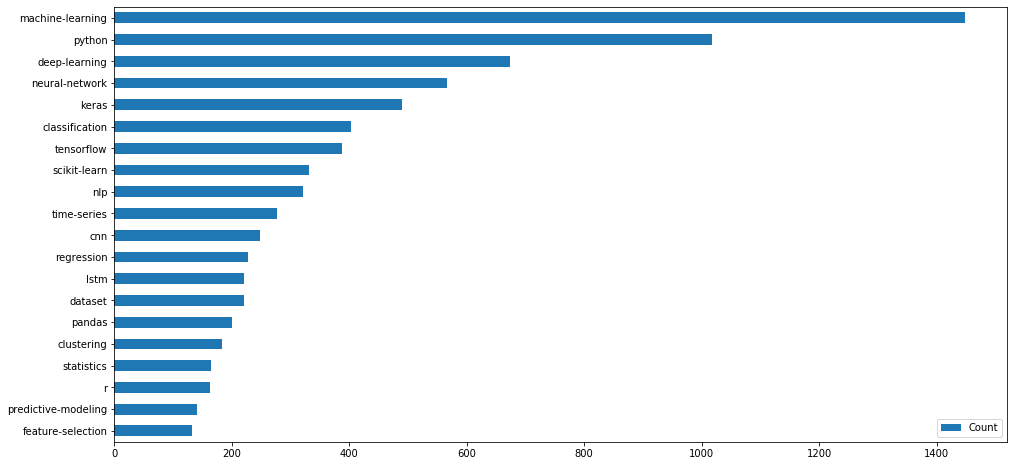

In [11]:
most_used.plot(kind="barh", figsize=(16,8))

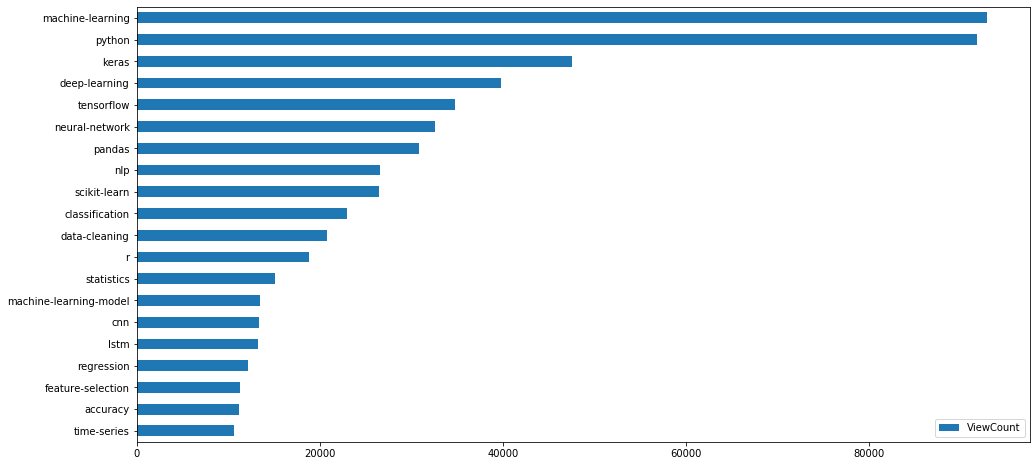

In [12]:
tag_view_count = dict()

for index, row in questions.iterrows():
    for tag in row['Tags']:
        if tag in tag_view_count:
            tag_view_count[tag] += row['ViewCount']
        else:
            tag_view_count[tag] = row['ViewCount']
            
tag_view_count = pd.DataFrame.from_dict(tag_view_count, orient="index")
tag_view_count.rename(columns={0: "ViewCount"}, inplace=True)

most_viewed = tag_view_count.sort_values(by="ViewCount").tail(20)

most_viewed.plot(kind="barh", figsize=(16,8))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001B789221CF8>],
      dtype=object)

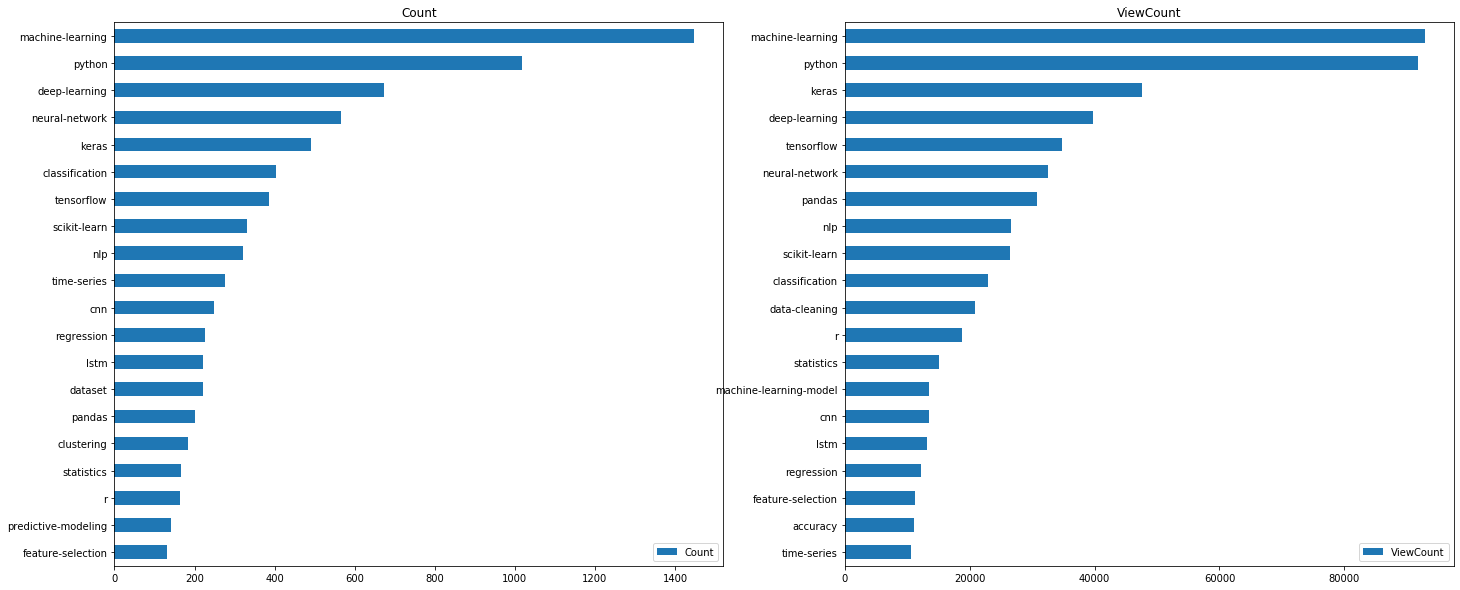

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches((24, 10))
most_used.plot(kind="barh", ax=axes[0], subplots=True)
most_viewed.plot(kind="barh", ax=axes[1], subplots=True)

In [14]:
in_used = pd.merge(most_used, most_viewed, how="left", left_index=True, right_index=True)
in_viewed = pd.merge(most_used, most_viewed, how="right", left_index=True, right_index=True)

In [15]:
all_tags = list(tag_count.index)

In [16]:
associations = pd.DataFrame(index=all_tags, columns=all_tags)
associations.iloc[0:4,0:4]

,python,data-mining,machine-learning-model,text-classification
python,NaN,NaN,NaN,NaN
data-mining,NaN,NaN,NaN,NaN
machine-learning-model,NaN,NaN,NaN,NaN
text-classification,NaN,NaN,NaN,NaN


In [17]:
associations.fillna(0, inplace=True)

for tags in questions["Tags"]:
    associations.loc[tags, tags] += 1

In [18]:
relations_most_used = associations.loc[most_used.index, most_used.index]

def style_cells(x):
    helper_df = pd.DataFrame('', index=x.index, columns=x.columns)
    helper_df.loc["time-series", "r"] = "background-color: yellow"
    helper_df.loc["r", "time-series"] = "background-color: yellow"
    for k in range(helper_df.shape[0]):
        helper_df.iloc[k,k] = "color: blue"
    
    return helper_df

relations_most_used.style.apply(style_cells, axis=None)

,feature-selection,predictive-modeling,r,statistics,clustering,pandas,dataset,lstm,regression,cnn,time-series,nlp,scikit-learn,tensorflow,classification,keras,neural-network,deep-learning,python,machine-learning
feature-selection,132,5,3,5,5,2,4,3,7,2,1,2,16,1,5,3,7,11,20,52
predictive-modeling,5,140,3,16,4,2,9,2,17,0,20,3,8,2,19,1,9,16,25,58
r,3,3,163,8,8,0,9,2,13,0,8,2,1,0,8,2,7,4,14,38
statistics,5,16,8,165,3,1,4,2,10,0,14,2,3,2,9,0,8,15,21,56
clustering,5,4,8,3,184,3,6,0,3,0,7,9,18,3,15,0,0,5,47,50
pandas,2,2,0,1,3,201,15,5,4,0,11,5,24,0,1,2,0,1,132,14
dataset,4,9,9,4,6,15,220,1,5,4,11,6,9,7,17,7,15,19,31,60
lstm,3,2,2,2,0,5,1,221,8,13,55,14,0,26,7,74,44,47,32,48
regression,7,17,13,10,3,4,5,8,227,2,22,1,25,5,24,14,13,11,39,80
cnn,2,0,0,0,0,0,4,13,2,248,10,4,3,33,14,50,58,79,20,52


In [19]:
for i in range(relations_most_used.shape[0]):
    relations_most_used.iloc[i,i] = pd.np.NaN

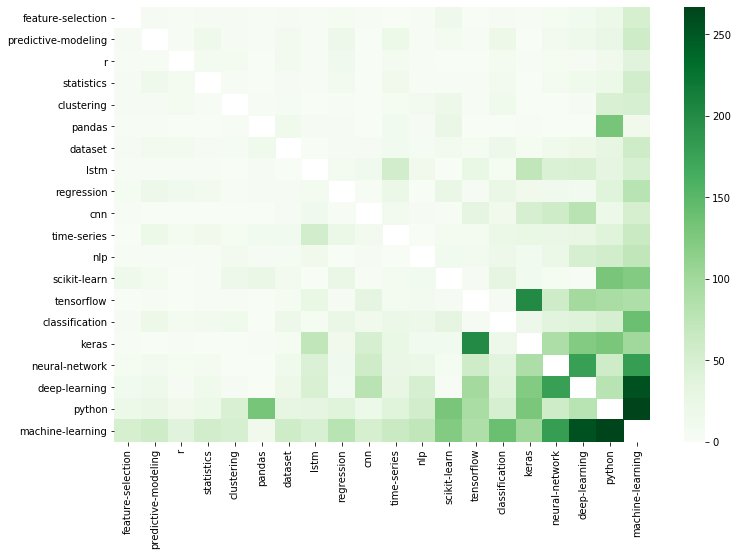

In [20]:
plt.figure(figsize=(12,8))
sns.heatmap(relations_most_used, cmap="Greens", annot=False)